In [10]:
from platform import python_version

print(python_version())

3.8.2


In [11]:
def filterLightCurves(lc):
    isGood = False
    for flux in lc.flux: 
        if flux < 0.95:
            isGood=True
            break

    return isGood
def openLCFile(f):
    return open(f).PDCSAP_FLUX.remove_nans().remove_outliers(sigma=6).normalize()

In [12]:
import lightkurve as lk
from lightkurve import TessLightCurve
from lightkurve.search import open 
import glob
import numpy as np
lcFiles = [f for f in glob.glob("sector28-301-1000/*lc.fits")]

In [13]:
LCs = list(map(openLCFile, lcFiles))
print(len(LCs))
filteredLCs = [lc for lc in LCs if filterLightCurves(lc)]
print(len(filteredLCs))

700
[TessLightCurve(TICID: 139723188), TessLightCurve(TICID: 53894450), TessLightCurve(TICID: 53939726), TessLightCurve(TICID: 69812590), TessLightCurve(TICID: 33716446), TessLightCurve(TICID: 147146907), TessLightCurve(TICID: 150166721), TessLightCurve(TICID: 144285761), TessLightCurve(TICID: 150144121), TessLightCurve(TICID: 97431961), TessLightCurve(TICID: 161154468), TessLightCurve(TICID: 144045880), TessLightCurve(TICID: 53896948), TessLightCurve(TICID: 52120587), TessLightCurve(TICID: 139257524), TessLightCurve(TICID: 139804925), TessLightCurve(TICID: 69813909), TessLightCurve(TICID: 140045537), TessLightCurve(TICID: 55650407), TessLightCurve(TICID: 70459861), TessLightCurve(TICID: 147266280), TessLightCurve(TICID: 50492743), TessLightCurve(TICID: 140943025), TessLightCurve(TICID: 139831293), TessLightCurve(TICID: 139327951), TessLightCurve(TICID: 152286180), TessLightCurve(TICID: 55741025), TessLightCurve(TICID: 41258782), TessLightCurve(TICID: 97403131), TessLightCurve(TICID: 1

In [14]:
#lc.query_solar_system_objects()

TIC 139723188  was discarded due to low pg power 11.662203299902608
TIC 53894450  was discarded due to low pg power 28.85141119535234
TIC 53939726  was discarded due to low pg power 41.586523506215734
TIC 69812590  was discarded due to low pg power 13.85947020650854
TIC 33716446  was discarded due to low pg power 11.655406182422505
4.900000000000004 d
TIC 147146907 : Folding on period  4.900000000000004 d
0.4900000000000002 d
TIC 150166721 : Folding on period  0.4900000000000002 d
TIC 144285761  was discarded due to low pg power 10.218520219378673
3.9100000000000033 d
TIC 150144121 : Folding on period  3.9100000000000033 d
TIC 97431961  was discarded due to low pg power 10.612773464562688
TIC 161154468  was discarded due to low pg power 17.61865355908651
TIC 144045880  was discarded due to low pg power 82.40668846174172
TIC 53896948  was discarded due to low pg power 8.930796388796521
TIC 52120587  was discarded due to low pg power 7.131569146617824
TIC 139257524  was discarded due to 

/home/ineeve/.local/lib/python3.8/site-packages/lightkurve/lightcurve.py:1249: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)


TIC 55741025 : Folding on period  11.83000000000001 d
TIC 41258782  was discarded due to low pg power 13.465559240463161
TIC 97403131  was discarded due to low pg power 24.8586462193647
TIC 142146238  was discarded due to low pg power 14.518019084580224
0.38000000000000006 d
TIC 144253818 : Folding on period  0.38000000000000006 d
TIC 154375139  was discarded due to low pg power 12.2897462321538
TIC 50385872  was discarded due to low pg power 17.074727501570003
TIC 150065151  was discarded due to low pg power 18.394906591786356
TIC 71266282  was discarded due to low pg power 12.771098323876442
TIC 62481662  was discarded due to low pg power 9.939490967416244
TIC 99499703  was discarded due to low pg power 21.91560869844835
TIC 141610893  was discarded due to low pg power 14.930778983075939
TIC 61710451  was discarded due to low pg power 20.437746176942575
2.3000000000000016 d
TIC 180412528 : Folding on period  2.3000000000000016 d
TIC 99739299  was discarded due to low pg power 24.0357

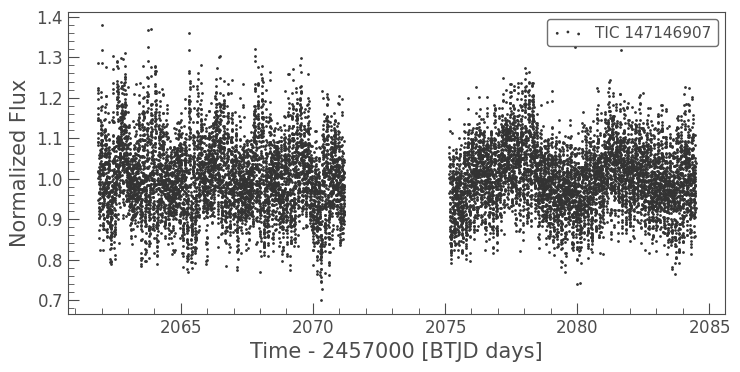

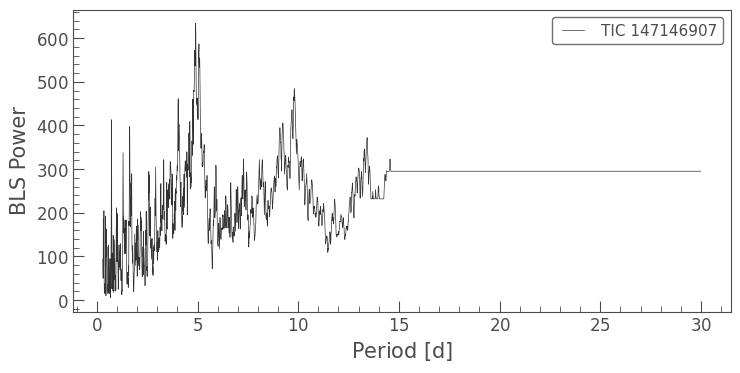

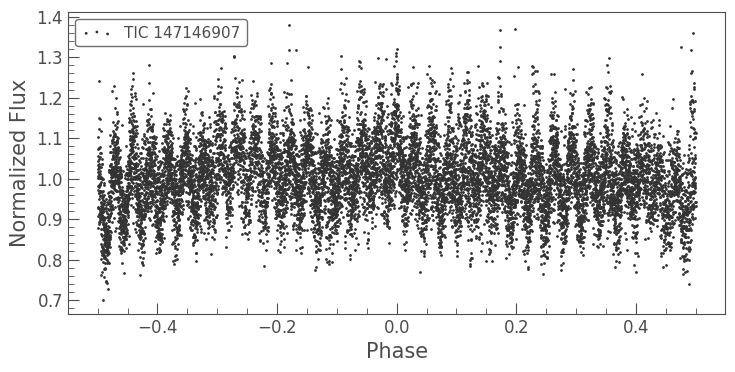

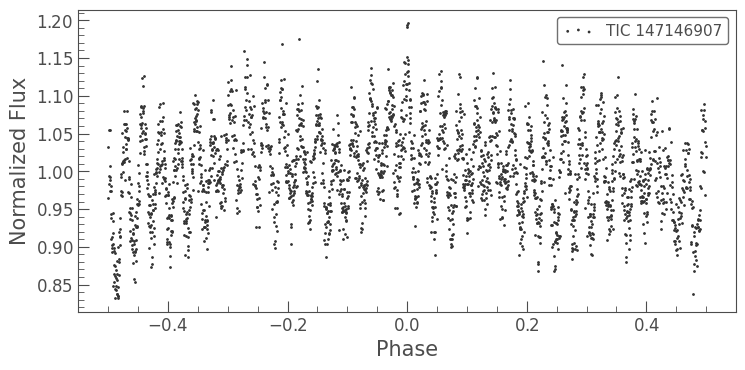

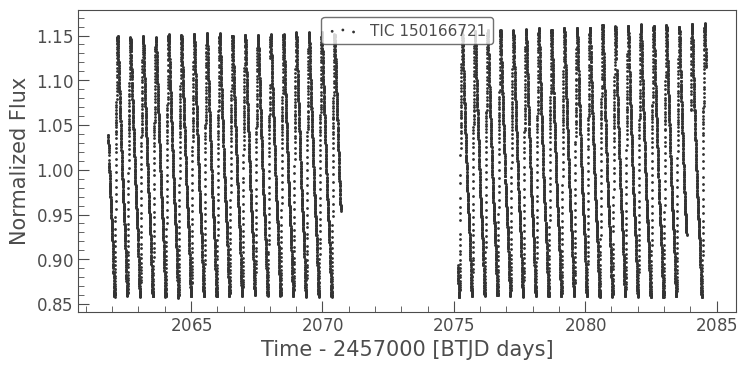

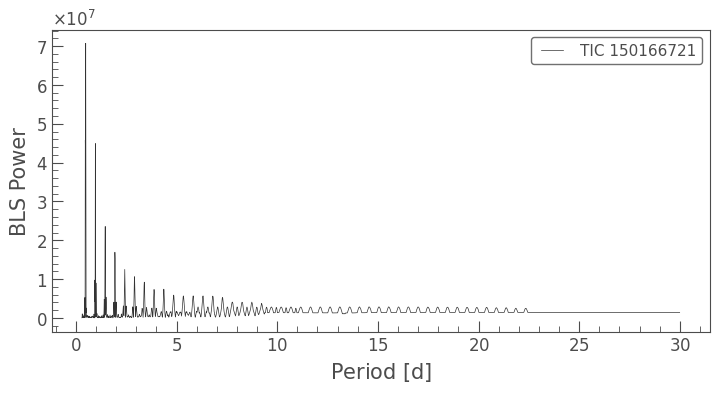

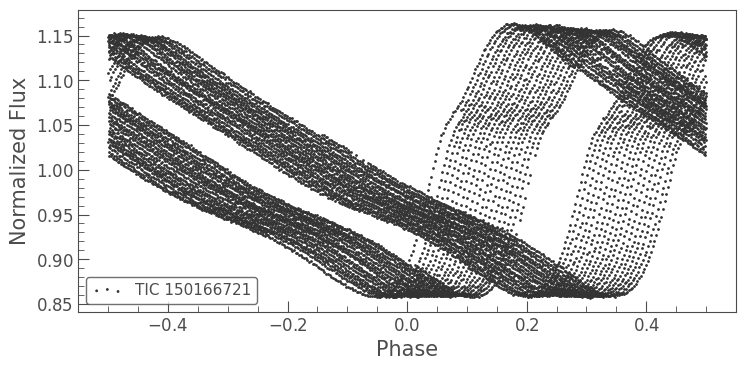

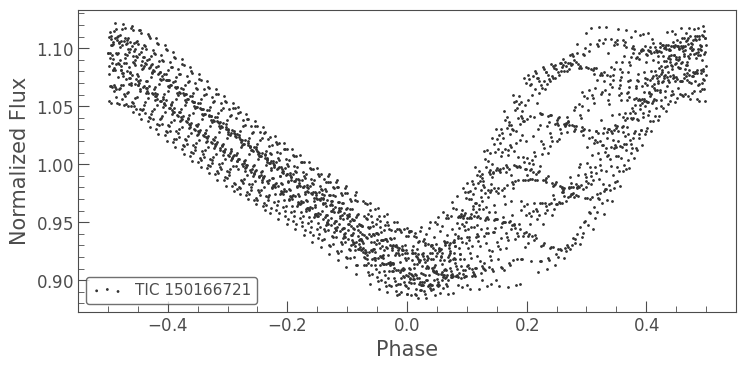

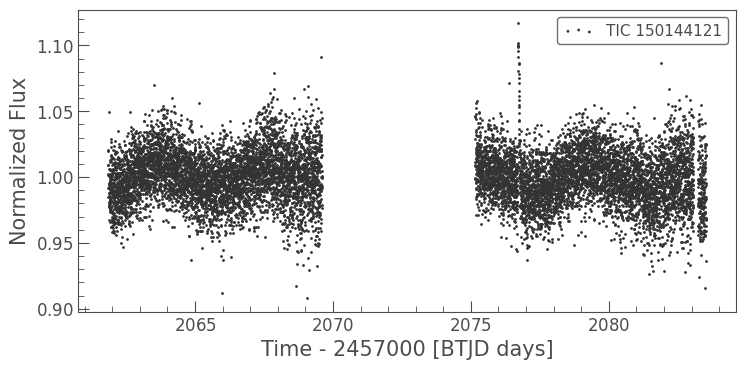

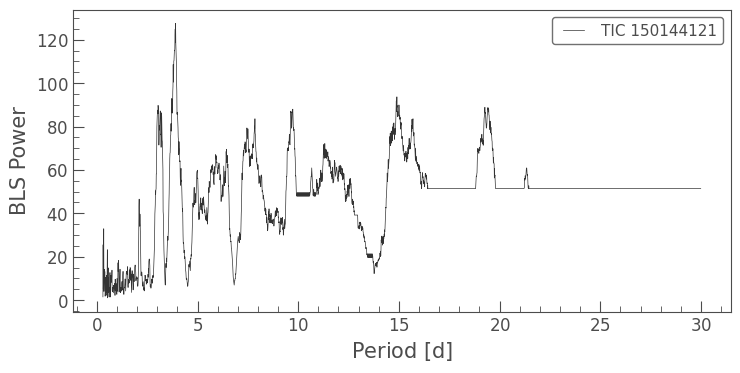

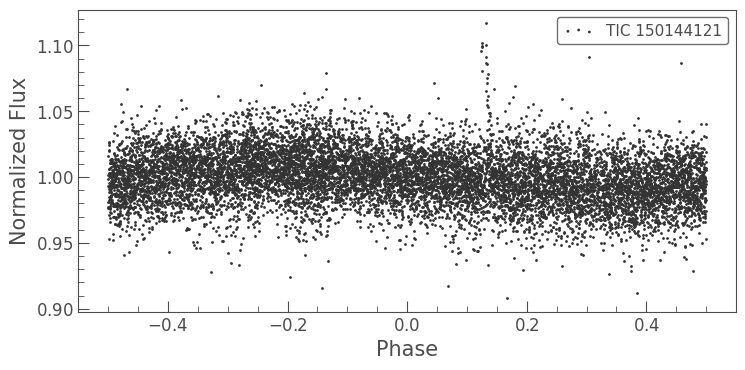

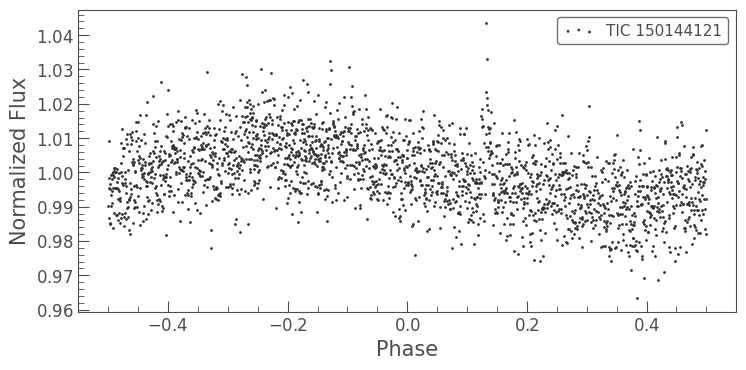

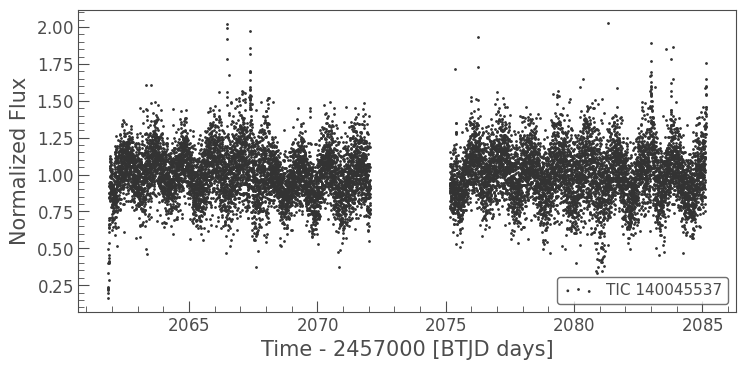

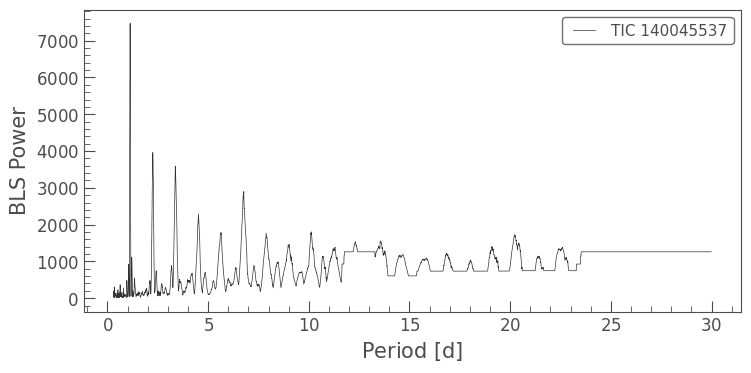

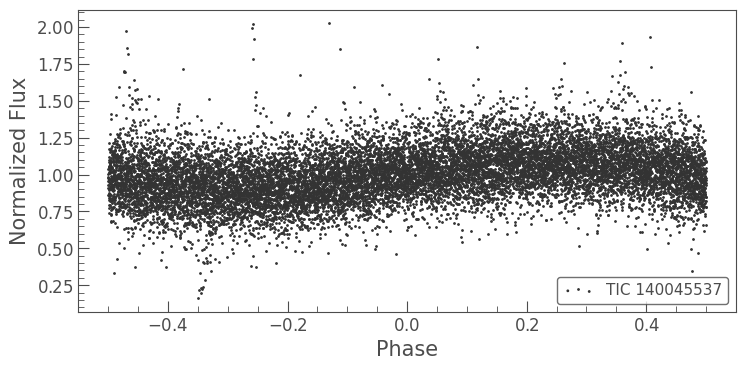

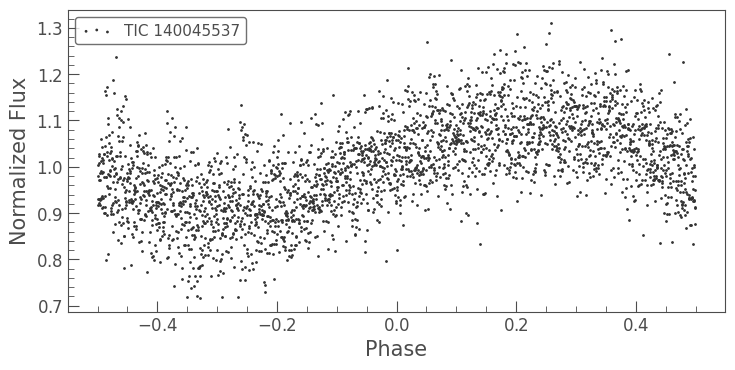

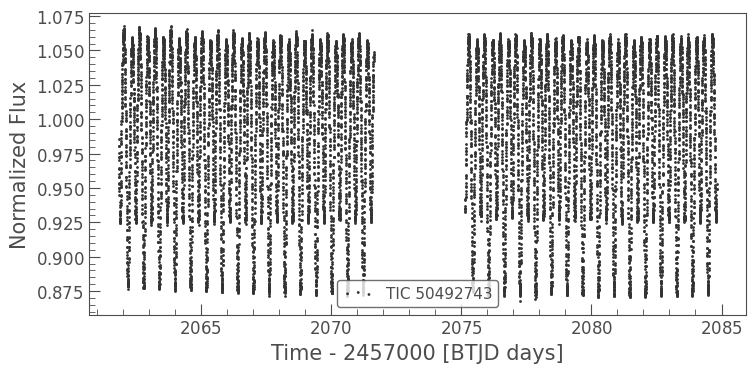

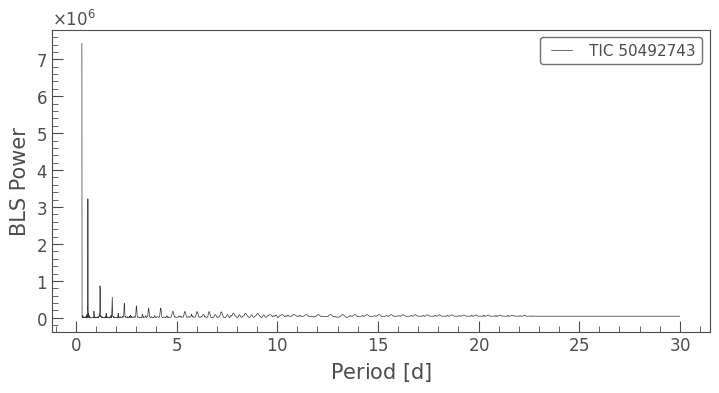

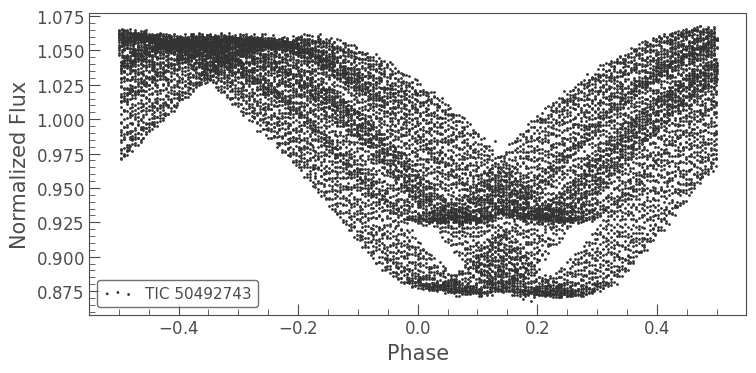

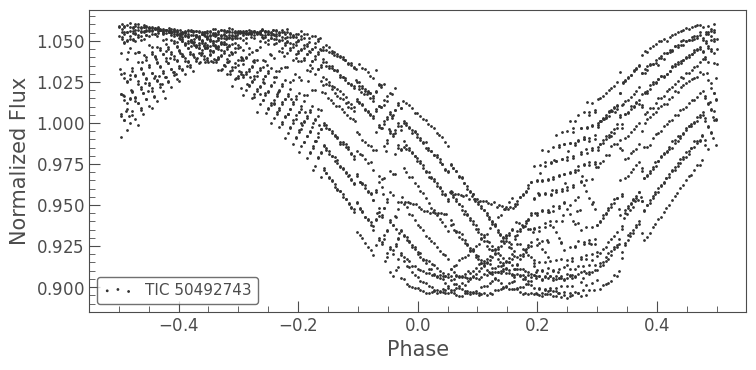

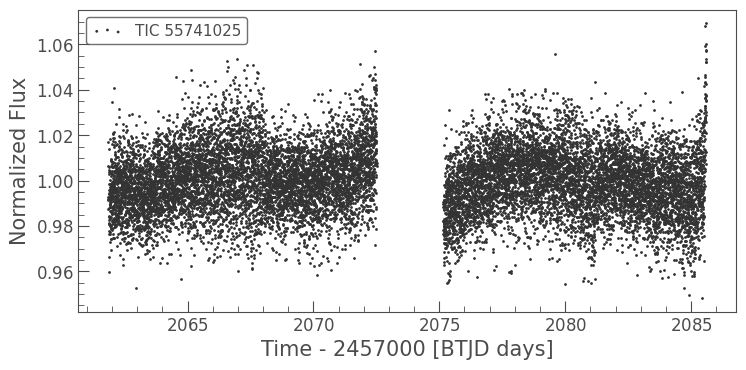

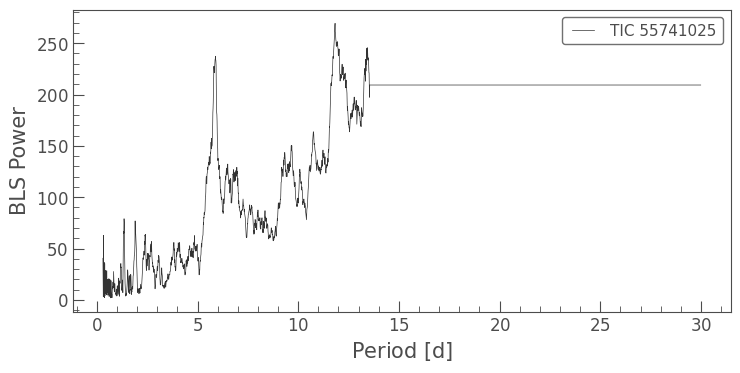

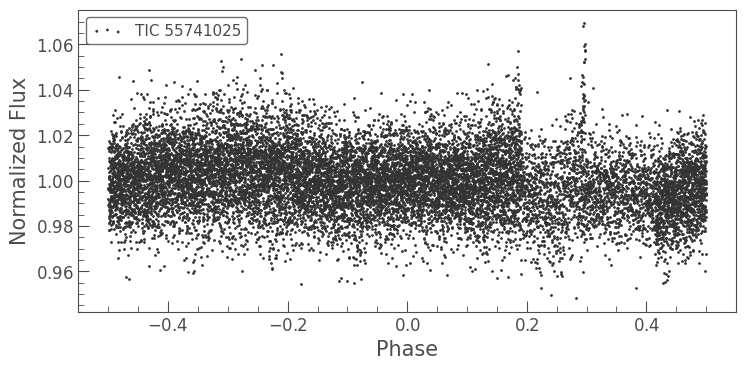

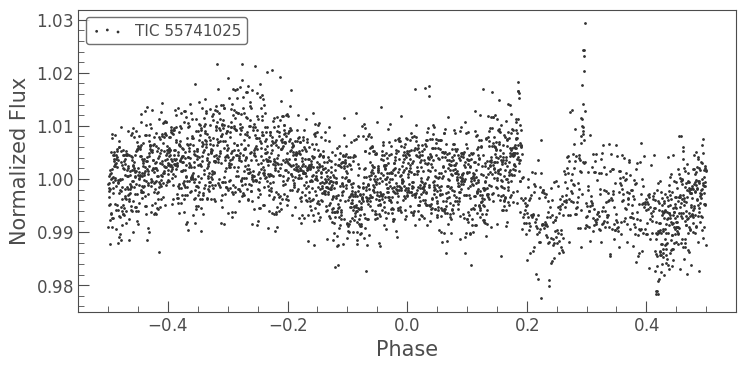

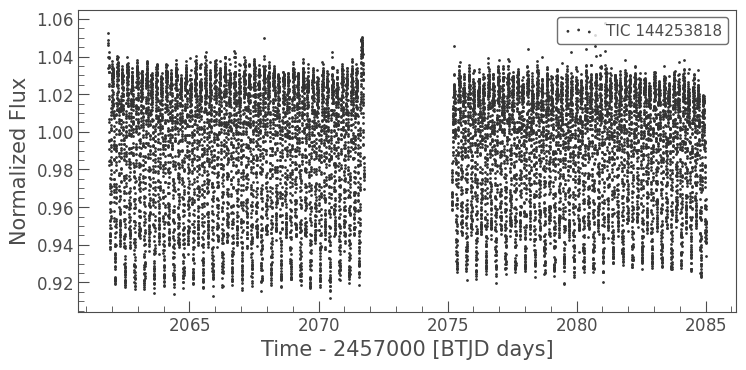

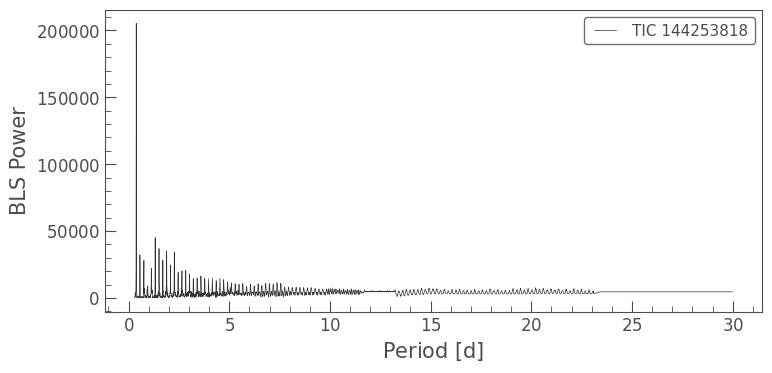

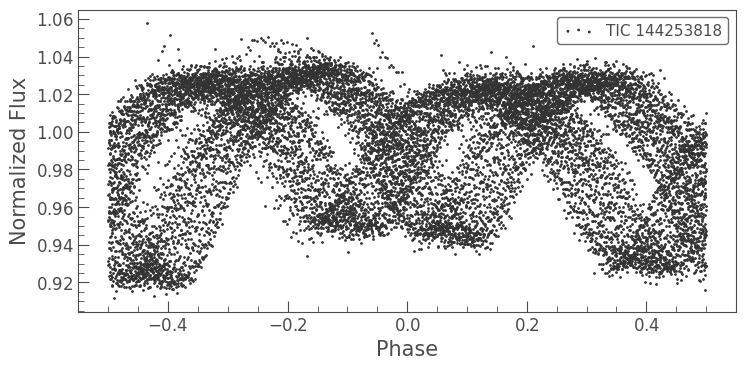

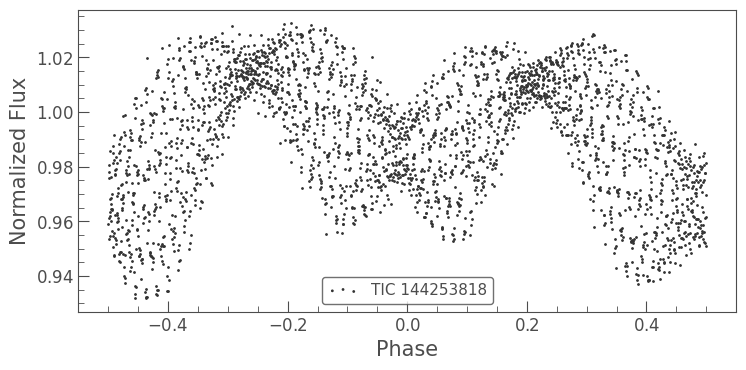

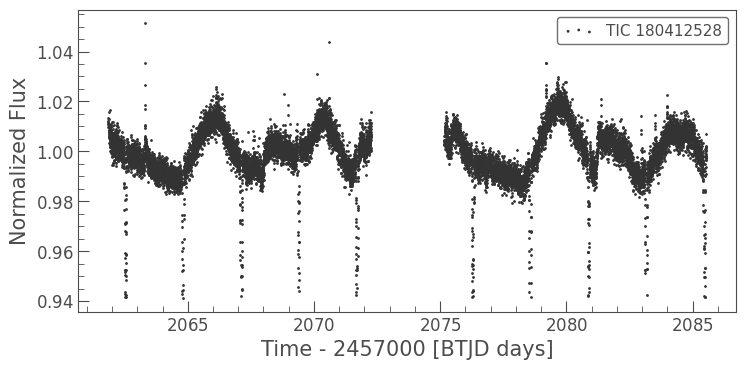

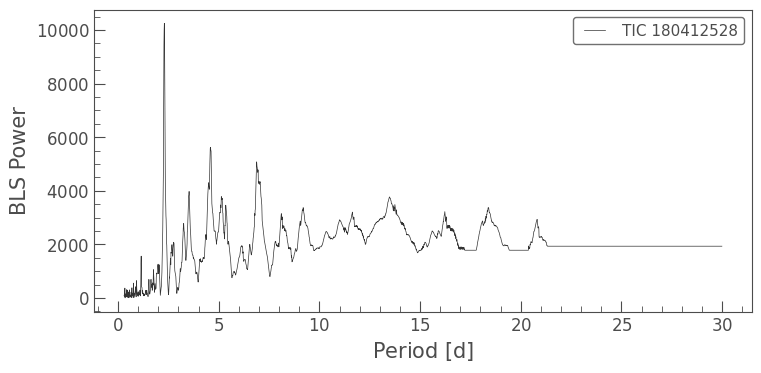

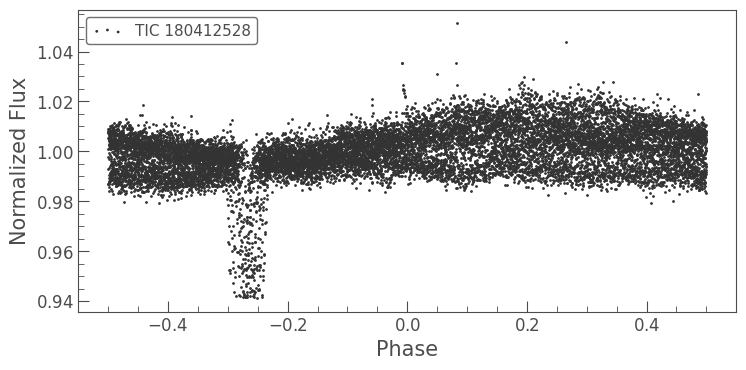

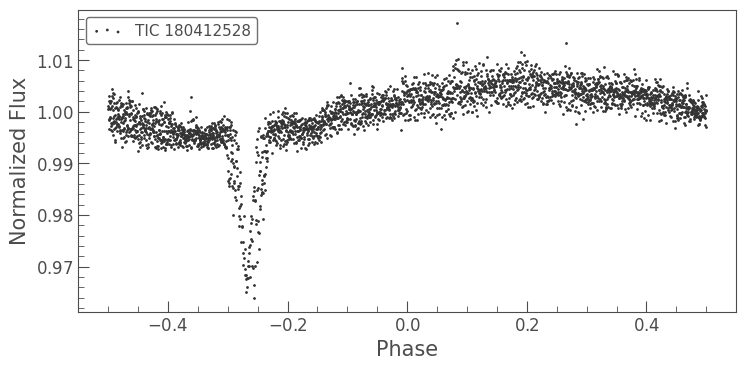

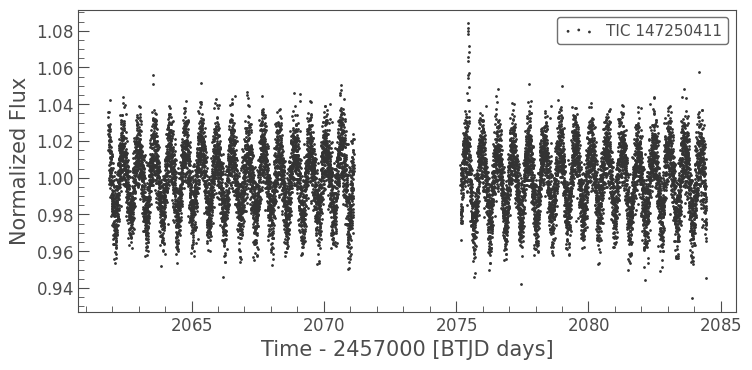

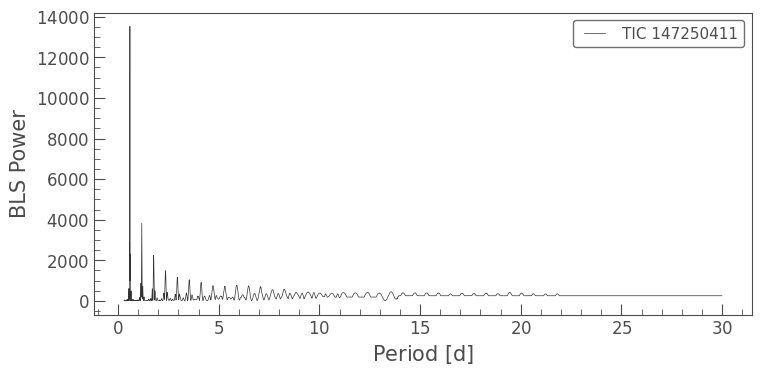

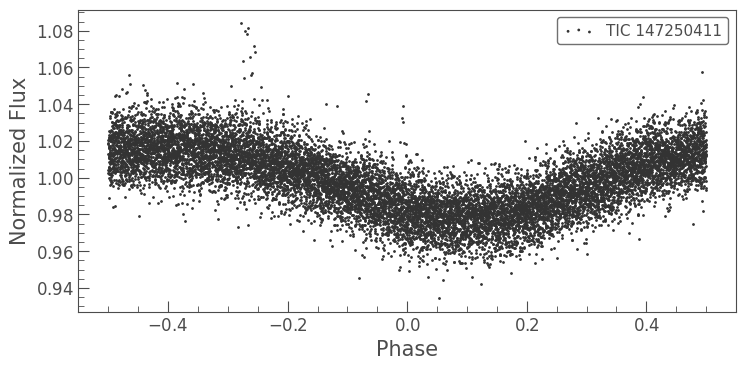

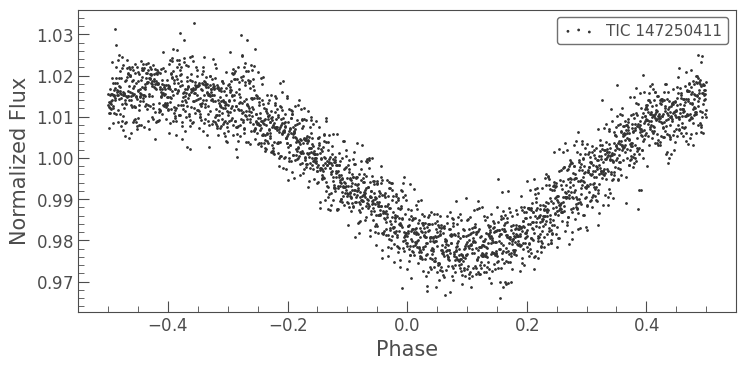

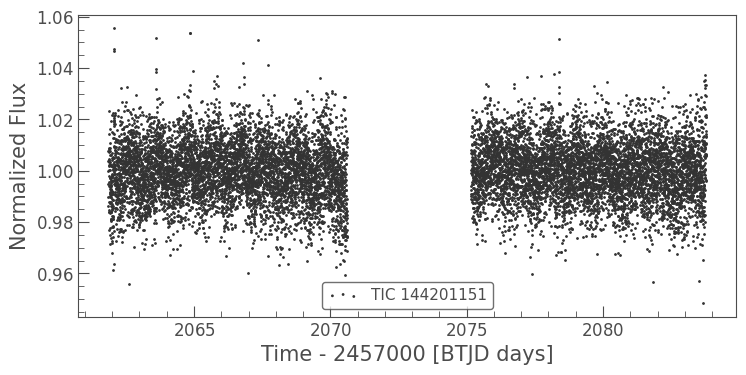

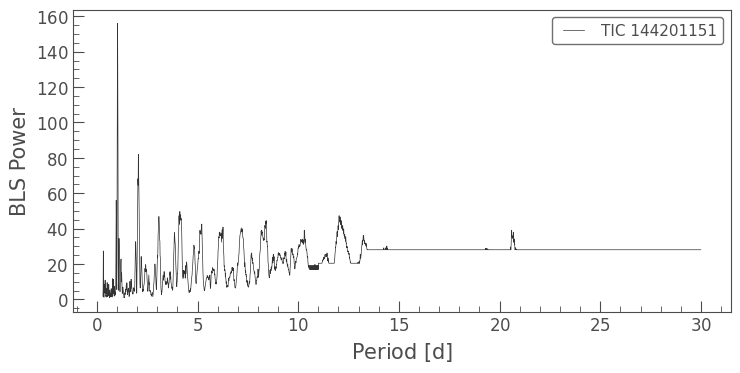

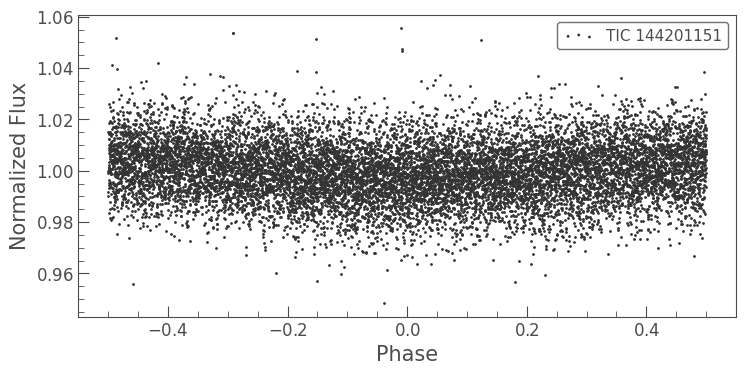

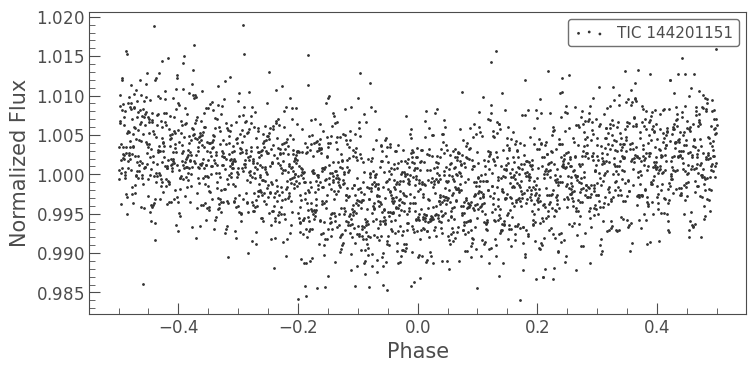

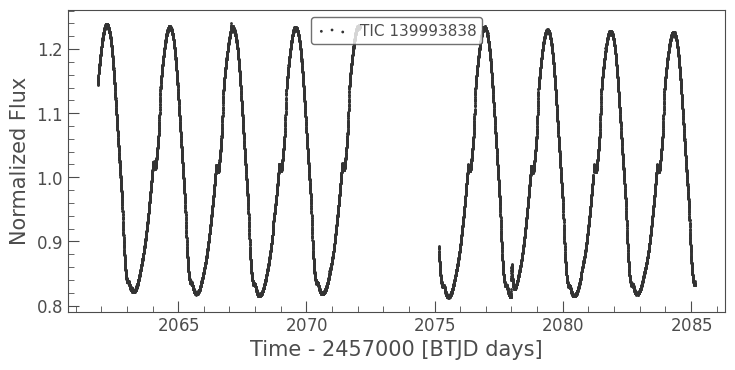

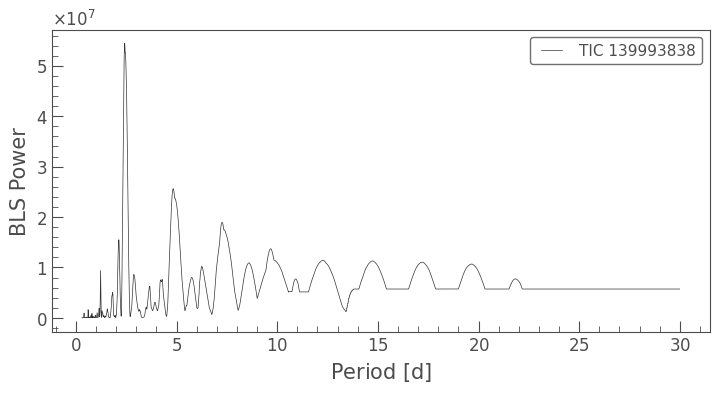

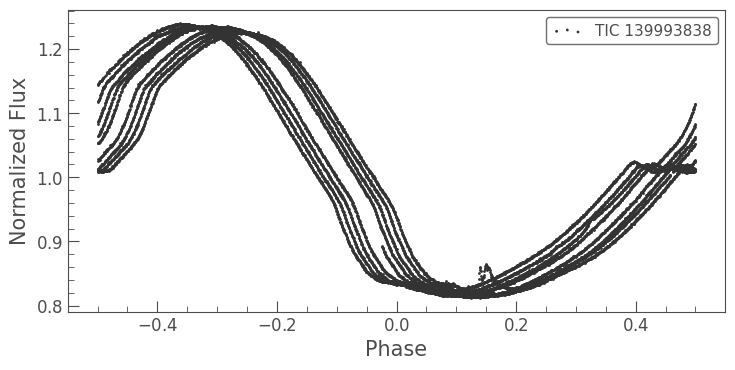

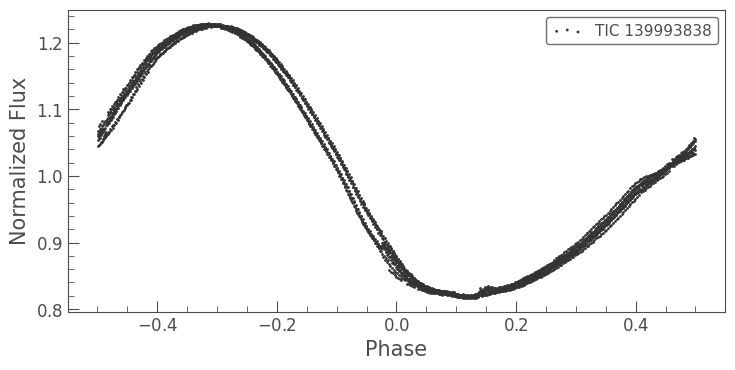

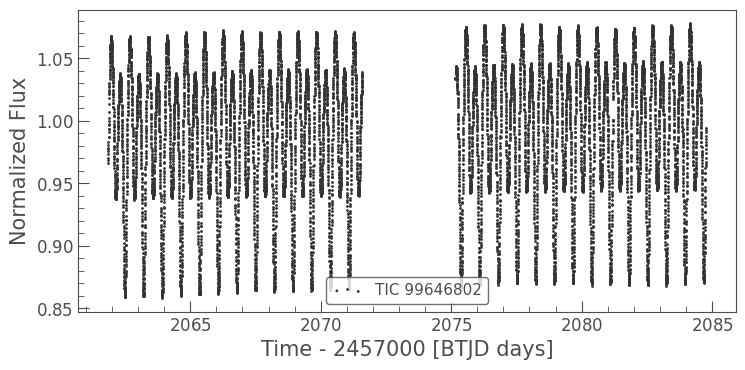

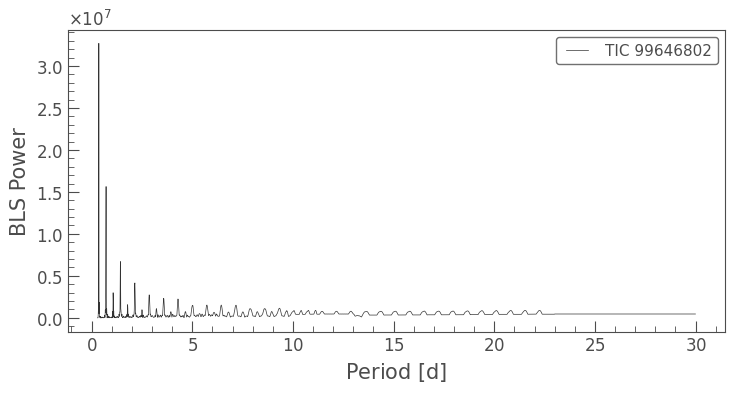

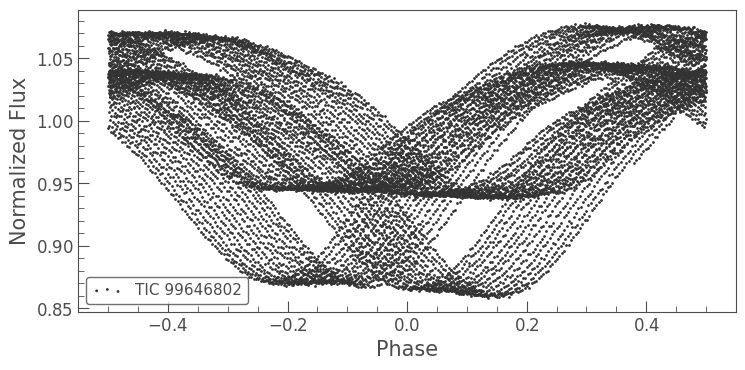

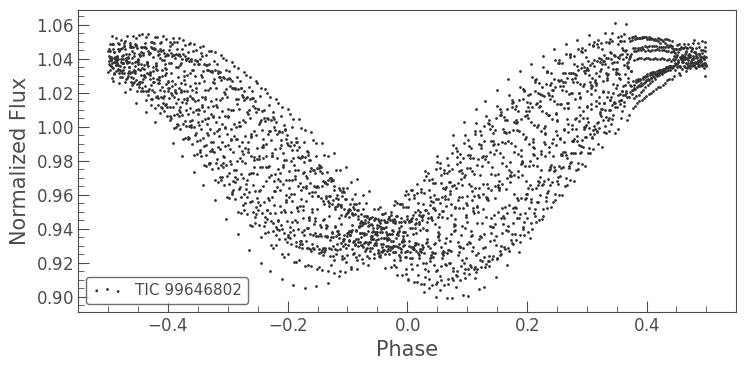

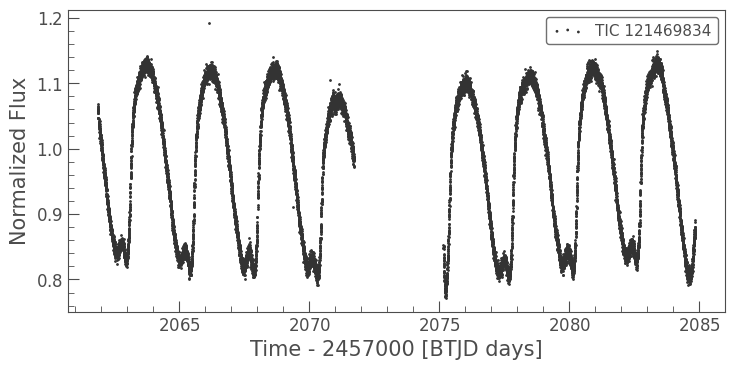

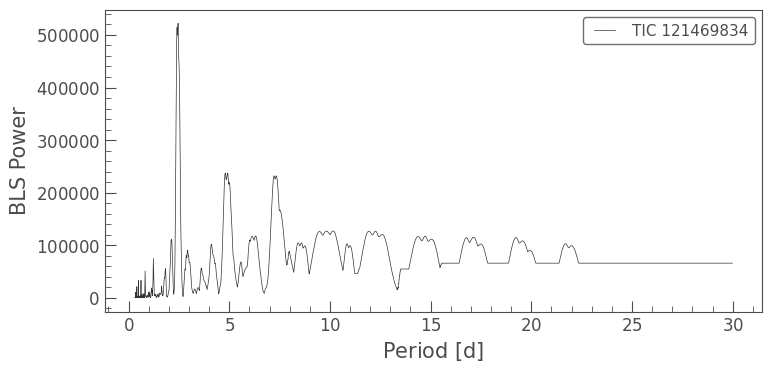

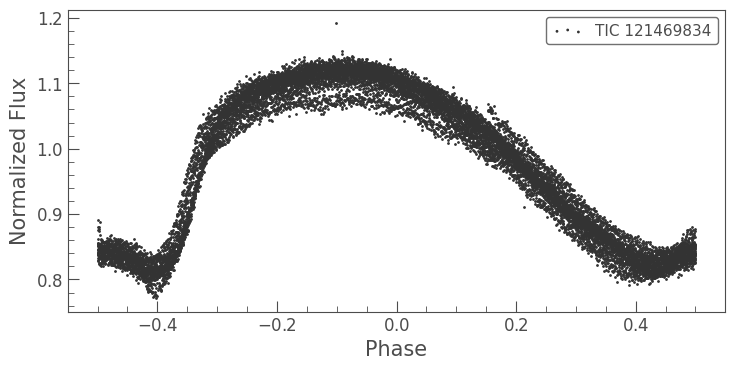

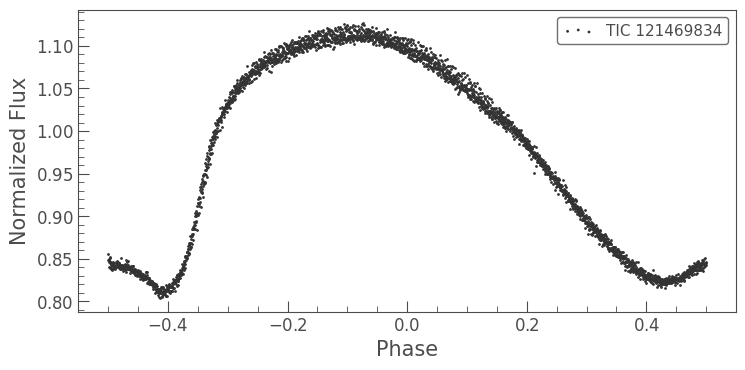

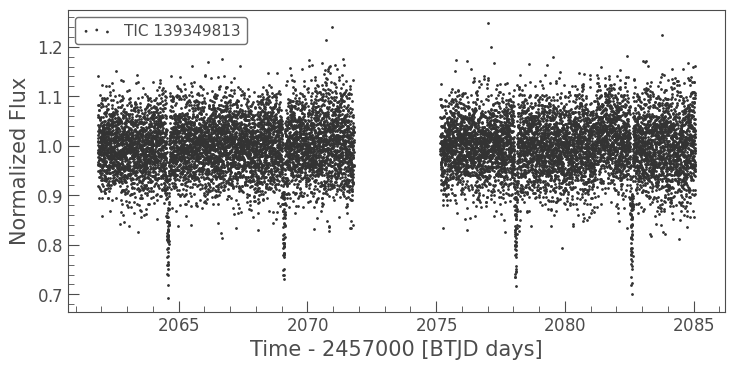

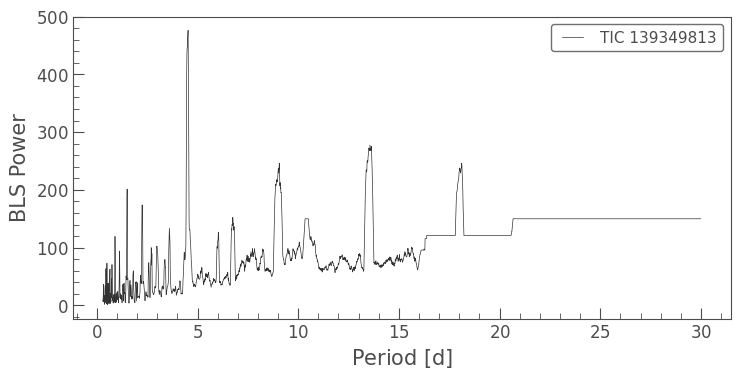

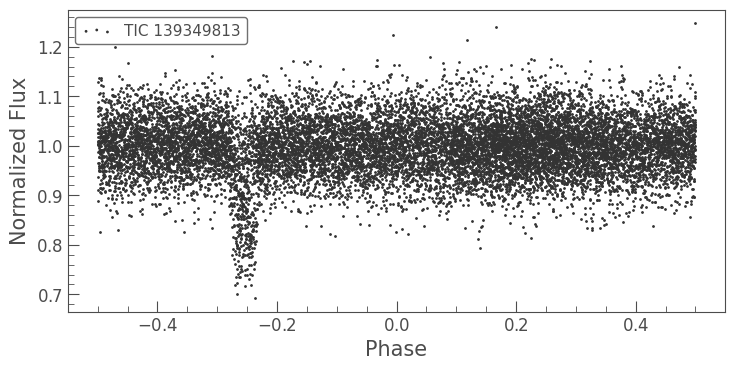

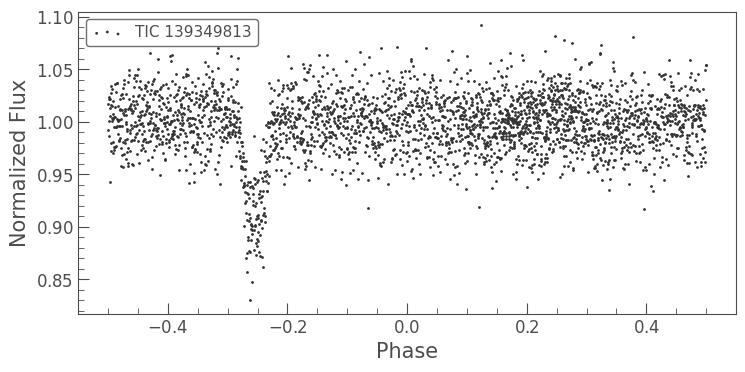

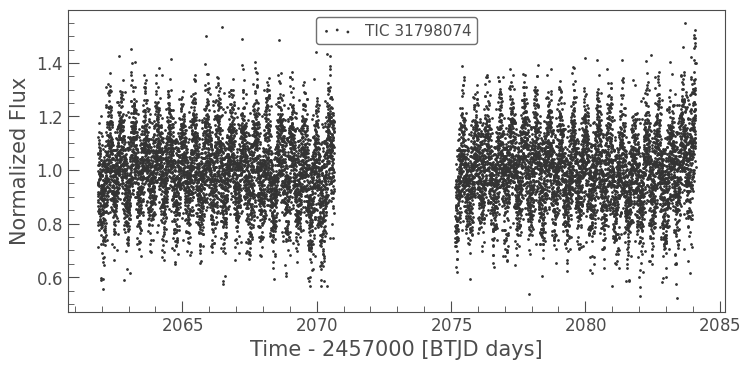

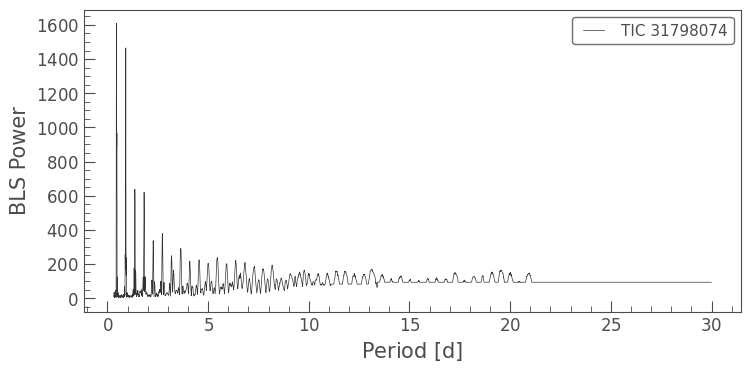

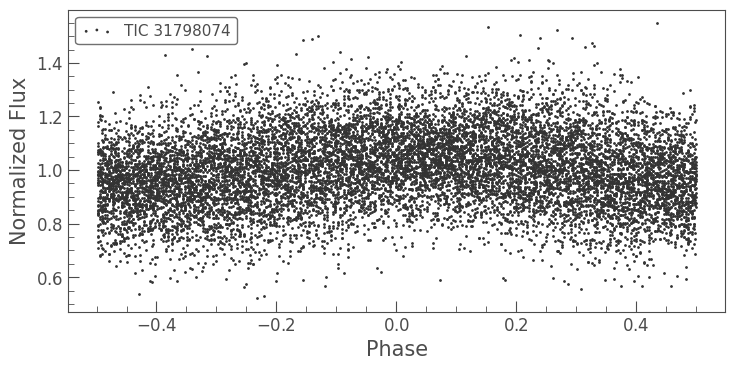

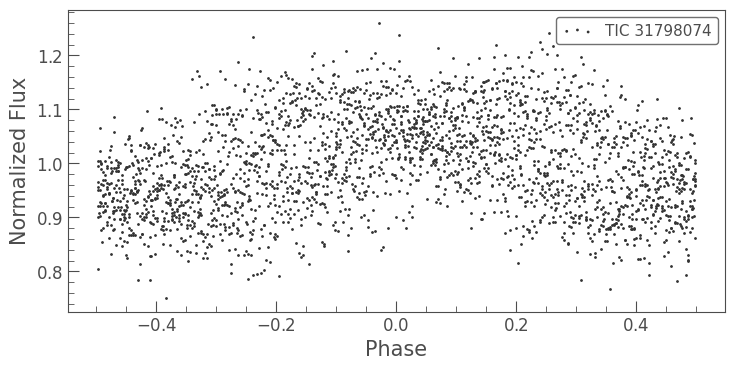

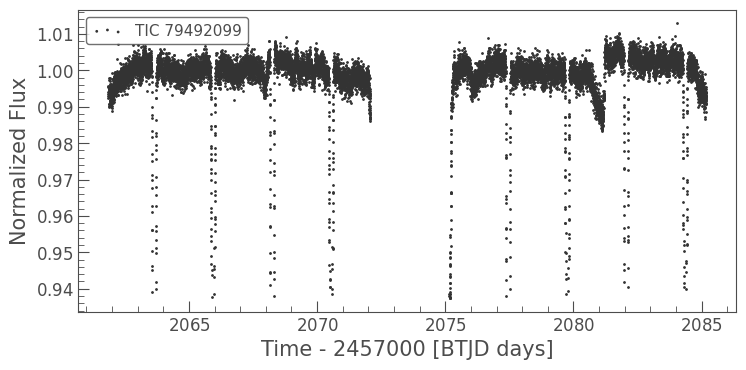

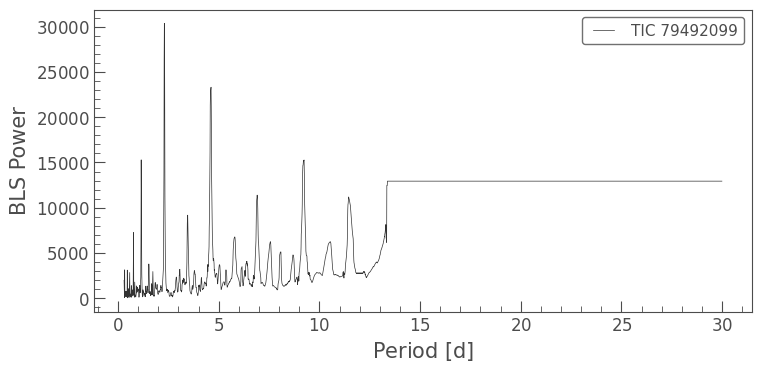

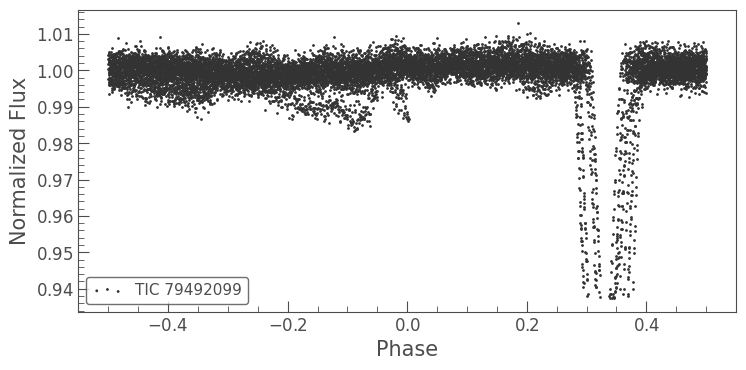

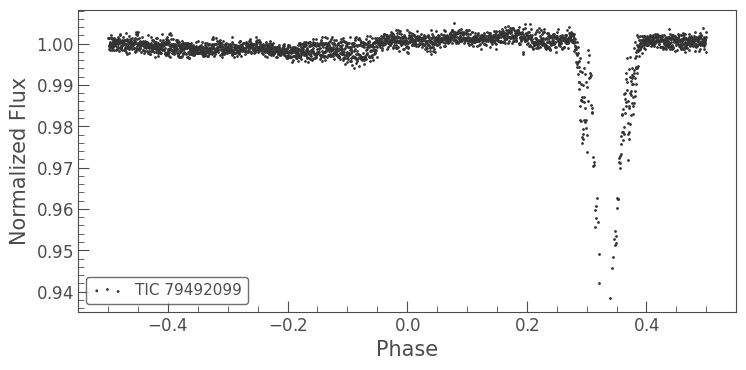

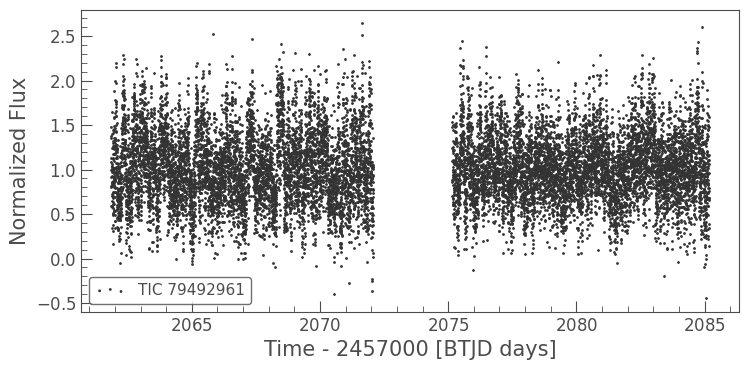

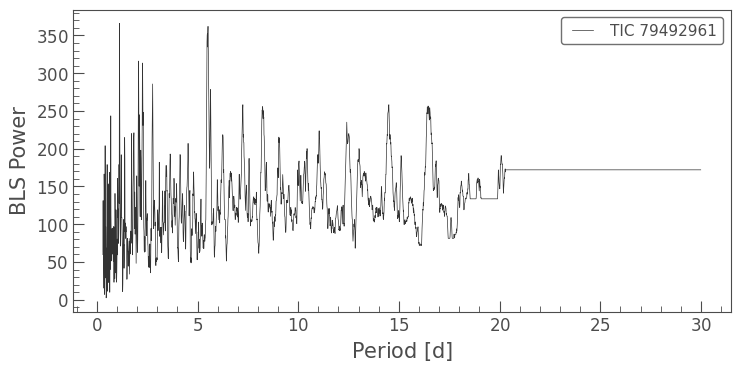

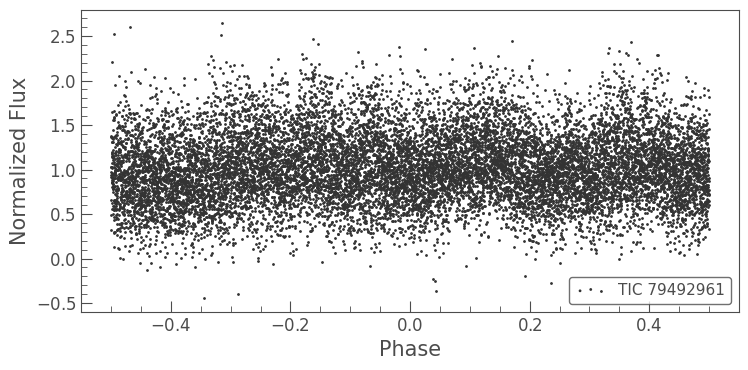

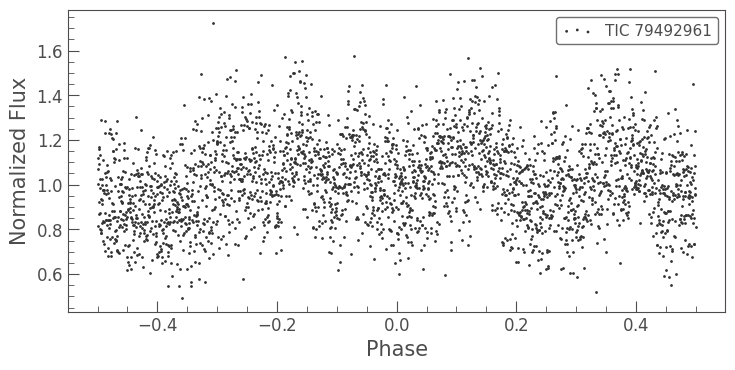

In [16]:
#mask = (lc.time < 2072) | (lc.time > 2075)
interesting_systems = []
for lc in filteredLCs:
    
    #masked_lc = lc[mask]
    pg = lc.to_periodogram(method="bls", period=np.arange(0.3, 30, 0.01))
    if (pg.max_power > 100):
        interesting_systems.append(lc)
        print(pg.period_at_max_power)
        folded_lc = lc.fold(period=pg.period_at_max_power)
        binned_lc = folded_lc.bin(binsize=5)  # Average 5 points per bin
        lc.scatter()
        pg.plot()
        print(lc.label, ": Folding on period ", pg.period_at_max_power)
        folded_lc.scatter()
        binned_lc.scatter()
    else:
        print(lc.label, " was discarded due to low pg power", pg.max_power)

print("Interesting systems", interesting_systems)
    